# ScfindME: Mining Alternative Splicing Patterns in Large Single-cell Atlases

## Example analysis worlflow
**Author:**  
Yuyao Song  
**Date:**  
2020.11.30  

## 1. Set up

### 1.1 Install package

In [1]:
# to install the latest release from GitHub, use master branch first

install.packages("devtools")
devtools::install_github("hemberg-lab/scfindME", force = TRUE)

Installing package into ‘/home/jovyan/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

Warning message in install.packages("devtools"):
“installation of package ‘devtools’ had non-zero exit status”



ps         (1.4.0  -> 1.5.0 ) [CRAN]
jsonlite   (1.7.1  -> 1.7.2 ) [CRAN]
data.table (1.13.2 -> 1.13.4) [CRAN]


Skipping 3 packages not available: biomaRt, SummarizedExperiment, SingleCellExperiment

Installing 3 packages: ps, jsonlite, data.table

Installing packages into ‘/home/jovyan/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/Rtmp0emTGZ/remotes1093c60031a/hemberg-lab-scfindME-5c8c69f/DESCRIPTION’
─  preparing ‘scfindME’:
✔  checking DESCRIPTION meta-information
─  cleaning src
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘scfindME_0.1.0.tar.gz’
   


Installing package into ‘/home/jovyan/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



### 1.2 Load packages

In [2]:
# load the package scfindME
# also load packages for data manipulation and visulisation

library(scfindME)
library(tibble)
library(dplyr)
library(tidyr)
library(ggplot2)
library(repr)

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
# a useful function for setting figure size

library(repr)
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

### 1.3 Load example index

In [4]:
# These are the pre-built indices using the Tasic et al.(2016) dataset
# The dataset have detailed subtype classifications of glutamatergic neurons and GABA-ergic neurons in the mouse primary visual cortex

index.glu <- loadObject("~/index.above.glu.z.rds")
index.GABA <- loadObject("~/index.above.GABA.z.rds")

72 MB 
Version 6
76 MB 
Version 6


In [5]:
# the index is a SCFind class object
class(index.glu)

# the object contains four attributes
slotNames(index.glu)

# the metadata attribute further stores splicing-related information for comprehending results
names(index.glu@metadata)

[1] "SCFind"
attr(,"package")
[1] "scfindME"

[1] "index"      "datasets"   "serialized" "metadata"

[1] "node_list"  "stats"      "read_count" "type"

### 1.4 Build custom index 

In [6]:
# please refer to the scfindME package vignette on how to build input matrix from scratch
# here we load the input matrix as an .rds object

scaled_matrix <- readRDS("~/scfindME_data/Tasic2016/scaled.glu.above.z.rds")
metadata <- readRDS("~/scfindME_data/Tasic2016/metadata.glu.rds")

In [7]:
# load metadata and select those belongs to gultamatergic neurons

metadata$primary_type <- droplevels(metadata$primary_type)
levels(metadata$primary_type)

[1] "L2 Ngb"        "L2/3 Ptgs2"    "L4 Arf5"       "L4 Ctxn3"     
 [5] "L4 Scnn1a"     "L5 Chrna6"     "L5 Ucma"       "L5a Batf3"    
 [9] "L5a Hsd11b1"   "L5a Pde1c"     "L5a Tcerg1l"   "L5b Cdh13"    
[13] "L5b Tph2"      "L6a Car12"     "L6a Mgp"       "L6a Sla"      
[17] "L6a Syt17"     "L6b Rgs12"     "L6b Serpinb11"

In [8]:
# build an index object for fast searching

index_custom <- buildAltSpliceIndex(scaled_matrix, metadata, "glutamatergic_neurons", "primary_type", qb = 2)

Generating index for glutamatergic_neurons

	Indexing L2 Ngb as glutamatergic_neurons.L2 Ngb  with  21  cells.

	Indexing L2/3 Ptgs2 as glutamatergic_neurons.L2/3 Ptgs2  with  94  cells.

	Indexing L4 Arf5 as glutamatergic_neurons.L4 Arf5  with  44  cells.

	Indexing L4 Ctxn3 as glutamatergic_neurons.L4 Ctxn3  with  79  cells.

	Indexing L4 Scnn1a as glutamatergic_neurons.L4 Scnn1a  with  98  cells.

	Indexing L5 Chrna6 as glutamatergic_neurons.L5 Chrna6  with  8  cells.

	Indexing L5 Ucma as glutamatergic_neurons.L5 Ucma  with  16  cells.

	Indexing L5a Batf3 as glutamatergic_neurons.L5a Batf3  with  64  cells.

	Indexing L5a Hsd11b1 as glutamatergic_neurons.L5a Hsd11b1  with  53  cells.

	Indexing L5a Pde1c as glutamatergic_neurons.L5a Pde1c  with  19  cells.

	Indexing L5a Tcerg1l as glutamatergic_neurons.L5a Tcerg1l  with  35  cells.

	Indexing L5b Cdh13 as glutamatergic_neurons.L5b Cdh13  with  32  cells.

	Indexing L5b Tph2 as glutamatergic_neurons.L5b Tph2  with  27  cells.

	In

In [9]:
# the indexing approach significantly reduce data size and benefit 

object.size(scaled_matrix)
object.size(index_custom)

610879704 bytes

1896 bytes

## 2. Exploratory analysis

In [10]:
# first, check the avaliable cell types from previous annotations

cell_type_glu <- cellTypeNames(index.glu)
cell_type_GABA <- cellTypeNames(index.GABA)
cell_type_glu
cell_type_GABA

[1] "glutamatergic neuron.L2 Ngb"        "glutamatergic neuron.L2/3 Ptgs2"   
 [3] "glutamatergic neuron.L4 Arf5"       "glutamatergic neuron.L4 Ctxn3"     
 [5] "glutamatergic neuron.L4 Scnn1a"     "glutamatergic neuron.L5 Chrna6"    
 [7] "glutamatergic neuron.L5 Ucma"       "glutamatergic neuron.L5a Batf3"    
 [9] "glutamatergic neuron.L5a Hsd11b1"   "glutamatergic neuron.L5a Pde1c"    
[11] "glutamatergic neuron.L5a Tcerg1l"   "glutamatergic neuron.L5b Cdh13"    
[13] "glutamatergic neuron.L5b Tph2"      "glutamatergic neuron.L6a Car12"    
[15] "glutamatergic neuron.L6a Mgp"       "glutamatergic neuron.L6a Sla"      
[17] "glutamatergic neuron.L6a Syt17"     "glutamatergic neuron.L6b Rgs12"    
[19] "glutamatergic neuron.L6b Serpinb11"

[1] "GABA-ergic neurons.Igtp"        "GABA-ergic neurons.Ndnf Car4"  
 [3] "GABA-ergic neurons.Ndnf Cxcl14" "GABA-ergic neurons.Pvalb Cpne5"
 [5] "GABA-ergic neurons.Pvalb Gpx3"  "GABA-ergic neurons.Pvalb Obox3"
 [7] "GABA-ergic neurons.Pvalb Rspo2" "GABA-ergic neurons.Pvalb Tacr3"
 [9] "GABA-ergic neurons.Pvalb Tpbg"  "GABA-ergic neurons.Pvalb Wt1"  
[11] "GABA-ergic neurons.Smad3"       "GABA-ergic neurons.Sncg"       
[13] "GABA-ergic neurons.Sst Cbln4"   "GABA-ergic neurons.Sst Cdk6"   
[15] "GABA-ergic neurons.Sst Chodl"   "GABA-ergic neurons.Sst Myh8"   
[17] "GABA-ergic neurons.Sst Tacstd2" "GABA-ergic neurons.Sst Th"     
[19] "GABA-ergic neurons.Vip Chat"    "GABA-ergic neurons.Vip Gpc3"   
[21] "GABA-ergic neurons.Vip Mybpc1"  "GABA-ergic neurons.Vip Parm1"  
[23] "GABA-ergic neurons.Vip Sncg"

In [11]:
# get all the nodes encoded in the index object
# nodes that are not detected, or did not pass filters will not be indexed

node_list_glu <- scfindGenes(index.glu)
node_list_GABA <- scfindGenes(index.GABA)

### 2.1 Mine marker nodes of an interested cell type

In [12]:
# L2/3 Ptgs2 cells looks interesting since it spans two cortical layers
interested_cell_type <- "glutamatergic neuron.L2/3 Ptgs2"

# rank the splicing nodes by their frequency of above-mean inclusion in the dataset
# compare to background cell types from L2-l4
markers_Ptgs2 <- cellTypeMarkers(index.glu, "glutamatergic neuron.L2/3 Ptgs2", background.cell.types = cell_type_glu, top.k = 10)
markers_Ptgs2

,cellType,genes,tp,fp,fn,precision,recall,f1
,<fct>,<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
66227,glutamatergic neuron.L2/3 Ptgs2,ENSMUSG00000056296.17_5,54,41,40,0.5684211,0.5744681,0.5714286
53908,glutamatergic neuron.L2/3 Ptgs2,ENSMUSG00000039474.13_13,61,66,33,0.4803150,0.6489362,0.5520362
58342,glutamatergic neuron.L2/3 Ptgs2,ENSMUSG00000042671.12_26,52,48,42,0.5200000,0.5531915,0.5360825
76099,glutamatergic neuron.L2/3 Ptgs2,ENSMUSG00000089706.7_8,48,41,46,0.5393258,0.5106383,0.5245901
17824,glutamatergic neuron.L2/3 Ptgs2,ENSMUSG00000022425.16_5,87,154,7,0.3609959,0.9255320,0.5194030
45434,glutamatergic neuron.L2/3 Ptgs2,ENSMUSG00000033981.14_29,93,172,1,0.3509434,0.9893617,0.5181059
66540,glutamatergic neuron.L2/3 Ptgs2,ENSMUSG00000056820.7_1,41,28,53,0.5942029,0.4361702,0.5030675
54992,glutamatergic neuron.L2/3 Ptgs2,ENSMUSG00000040183.13_30,47,49,47,0.4895833,0.5000000,0.4947369
42601,glutamatergic neuron.L2/3 Ptgs2,ENSMUSG00000032366.15_8,48,54,46,0.4705882,0.5106383,0.4897959


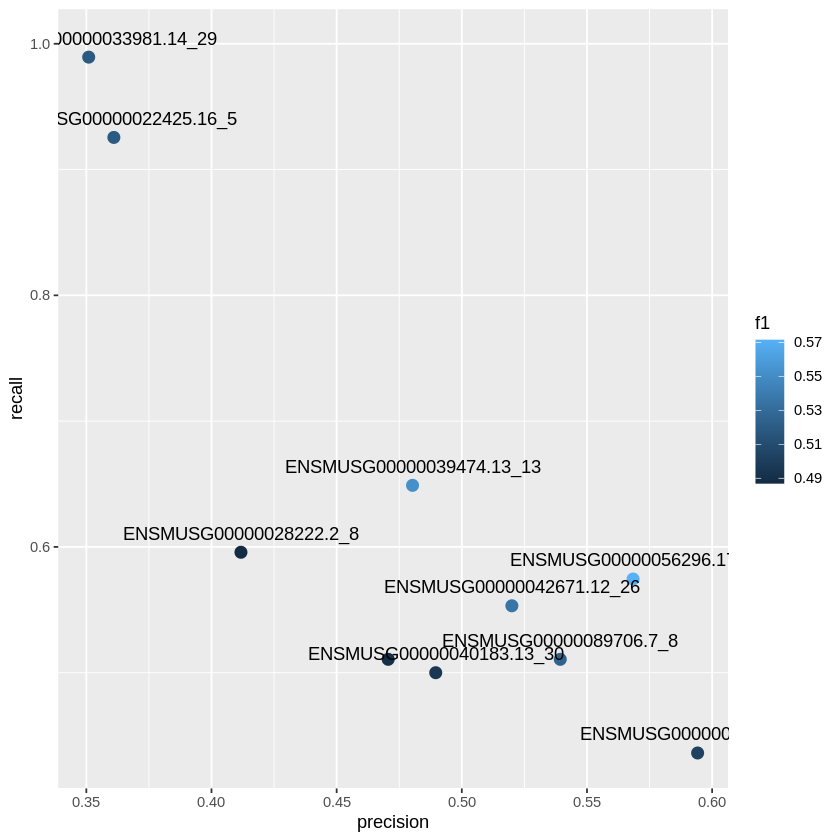

In [13]:
# plot the nodes using their precision. recall and f1 scores to examine

ggplot(markers_Ptgs2, aes(x = precision, 
                          y = recall, 
                          colour = f1, 
                          label = genes)) +
    geom_point(size = 3) +
    geom_text(vjust = 0, 
              nudge_y = 0.01, 
              colour = "black", 
              check_overlap = T)
fig(8, 8)

In [14]:
# OK... but the node names are confusing, who are they?
# lets see what genes does these marker nodes belongs to

nodeDetails(index.glu, as.character(markers_Ptgs2$genes))

,gene,gene_id,node_id,node_num,coord,strand,type,gene_name
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
21953,ENSMUSG00000022425,ENSMUSG00000022425.16,ENSMUSG00000022425.16_5,5,chr15:54919962-54920002,-,TS,Enpp2
38654,ENSMUSG00000028222,ENSMUSG00000028222.2,ENSMUSG00000028222.2_8,8,chr4:15895629-15895685,+,CE,Calb1
52536,ENSMUSG00000032366,ENSMUSG00000032366.15,ENSMUSG00000032366.15_8,8,chr9:67049192-67049201,-,TS,Tpm1
56152,ENSMUSG00000033981,ENSMUSG00000033981.14,ENSMUSG00000033981.14_29,29,chr3:80690404-80690518,-,CE,Gria2
66836,ENSMUSG00000039474,ENSMUSG00000039474.13,ENSMUSG00000039474.13_13,13,chr5:36966107-36968450,-,TE,Wfs1
68218,ENSMUSG00000040183,ENSMUSG00000040183.13,ENSMUSG00000040183.13_30,30,chr4:32804035-32805739,-,TE,Ankrd6
72478,ENSMUSG00000042671,ENSMUSG00000042671.12,ENSMUSG00000042671.12_26,26,chr1:153695579-153697667,+,TE,Rgs8
82625,ENSMUSG00000056296,ENSMUSG00000056296.17,ENSMUSG00000056296.17_5,5,chr14:13284877-13285002,+,AD,Synpr
82996,ENSMUSG00000056820,ENSMUSG00000056820.7,ENSMUSG00000056820.7_1,1,chr8:125012997-125013048,+,TS,Tsnax


In [15]:
as.character(markers_Ptgs2$genes)

[1] "ENSMUSG00000056296.17_5"  "ENSMUSG00000039474.13_13"
 [3] "ENSMUSG00000042671.12_26" "ENSMUSG00000089706.7_8"  
 [5] "ENSMUSG00000022425.16_5"  "ENSMUSG00000033981.14_29"
 [7] "ENSMUSG00000056820.7_1"   "ENSMUSG00000040183.13_30"
 [9] "ENSMUSG00000032366.15_8"  "ENSMUSG00000028222.2_8"

In [16]:
head(index.glu@metadata$node_list)

,gene,gene_id,node_id,node_num,coord,strand,type,gene_name
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
1,ENSMUSG00000000028,ENSMUSG00000000028.14,ENSMUSG00000000028.14_25,25,chr16:18780447-18780452,-,TE,Cdc45
2,ENSMUSG00000000028,ENSMUSG00000000028.14,ENSMUSG00000000028.14_1,1,chr16:18811973-18811987,-,TS,Cdc45
3,ENSMUSG00000000028,ENSMUSG00000000028.14,ENSMUSG00000000028.14_2,2,chr16:18811804-18811972,-,TS,Cdc45
4,ENSMUSG00000000028,ENSMUSG00000000028.14,ENSMUSG00000000028.14_24,24,chr16:18780453-18780573,-,TE,Cdc45
5,ENSMUSG00000000028,ENSMUSG00000000028.14,ENSMUSG00000000028.14_8,8,chr16:18808732-18808869,-,CE,Cdc45
6,ENSMUSG00000000037,ENSMUSG00000000037.16,ENSMUSG00000000037.16_6,6,chrX:161162750-161162771,+,TS,Scml2


### 2.2 Search enriched cell types by interested splicing events

In [17]:
# since we are observing glutamatergic neurons, Gria2 (Glutamate Ionotropic Receptor AMPA Type Subunit 2) looks familiar
# so what core exons we have for this gene?

Gria2_nodes <- geneNodes(index.glu, "Gria2", "gene_name")
Gria2_nodes <- Gria2_nodes[order(as.numeric(as.character(Gria2_nodes$node_num))), ]

# select core exons to observe
Gria2_CE <- Gria2_nodes[which(Gria2_nodes$type == "CE"), ]
Gria2_CE <- Gria2_CE[order(as.numeric(as.character(Gria2_CE$node_num))), ]
Gria2_CE

,gene,gene_id,node_id,node_num,coord,strand,type,gene_name
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
56143,ENSMUSG00000033981,ENSMUSG00000033981.14,ENSMUSG00000033981.14_10,10,chr3:80740959-80741198,-,CE,Gria2
56148,ENSMUSG00000033981,ENSMUSG00000033981.14,ENSMUSG00000033981.14_12,12,chr3:80726832-80726885,-,CE,Gria2
56144,ENSMUSG00000033981,ENSMUSG00000033981.14,ENSMUSG00000033981.14_13,13,chr3:80722032-80722193,-,CE,Gria2
56145,ENSMUSG00000033981,ENSMUSG00000033981.14,ENSMUSG00000033981.14_14,14,chr3:80710677-80710844,-,CE,Gria2
56150,ENSMUSG00000033981,ENSMUSG00000033981.14,ENSMUSG00000033981.14_15,15,chr3:80710290-80710394,-,CE,Gria2
56162,ENSMUSG00000033981,ENSMUSG00000033981.14,ENSMUSG00000033981.14_16,16,chr3:80709378-80709488,-,CE,Gria2
56164,ENSMUSG00000033981,ENSMUSG00000033981.14,ENSMUSG00000033981.14_17,17,chr3:80707699-80707905,-,CE,Gria2
56160,ENSMUSG00000033981,ENSMUSG00000033981.14,ENSMUSG00000033981.14_20,20,chr3:80706888-80707258,-,CE,Gria2
56151,ENSMUSG00000033981,ENSMUSG00000033981.14,ENSMUSG00000033981.14_23,23,chr3:80702458-80702656,-,CE,Gria2


In [18]:
# Lets investiate node 28 and 29, two adjacent core exons
# What is the mean and standard deviation of PSI values for node 28 and 29?

Gria2_flip_flop <- c("ENSMUSG00000033981.14_28", "ENSMUSG00000033981.14_29")
Gria2_stats <- index.glu@metadata$stats[which(rownames(index.glu@metadata$stats) %in% Gria2_flip_flop), ]
Gria2_stats

,mean,SD
,<dbl>,<dbl>
ENSMUSG00000033981.14_28,0.7369618,0.3424049
ENSMUSG00000033981.14_29,0.2722713,0.3452548


In [19]:
# the central operation carried out by scfindME is to identify the set of cells that express a set of nodes
# lets query cell types using node 28 and node 29 of Gria2
# p-values for significance are calculated by the hypergeometric test

enriched_cell_types_28 <- hyperQueryCellTypesAS(index.glu, c("ENSMUSG00000033981.14_28"))
enriched_cell_types_29 <- hyperQueryCellTypesAS(index.glu, c("ENSMUSG00000033981.14_29"))
enriched_cell_types_28

Verified all query nodes are in index, generating results...

Verified all query nodes are in index, generating results...



cell_type,cell_hits,total_cells,pval
<fct>,<int>,<dbl>,<dbl>
glutamatergic neuron.L2/3 Ptgs2,1,94,1.000000e+00
glutamatergic neuron.L4 Arf5,42,44,7.323694e-07
glutamatergic neuron.L4 Ctxn3,69,79,3.601008e-06
glutamatergic neuron.L4 Scnn1a,91,98,4.638623e-12
glutamatergic neuron.L5 Chrna6,7,8,3.605902e-01
glutamatergic neuron.L5 Ucma,13,16,4.421327e-01
glutamatergic neuron.L5a Batf3,58,64,1.265488e-06
glutamatergic neuron.L5a Hsd11b1,47,53,8.791229e-05
glutamatergic neuron.L5a Pde1c,15,19,5.263691e-01


In [20]:
# some data manipulations for plotting
enriched_cell_types_28$node <- as.character(rep(28))
enriched_cell_types_29$node <- as.character(rep(29))

Gria2_flipflop_cell_types <- rbind(enriched_cell_types_28, enriched_cell_types_29)
Gria2_flipflop_cell_types$type <- gsub("glutamatergic neuron.", "", as.character(Gria2_flipflop_cell_types$cell_type))

# for very significant cell types, p value = 0, add 0.01 to plot them
Gria2_flipflop_cell_types$logp <- -log10(Gria2_flipflop_cell_types$pval + 0.01)


Warning message:
“Removed 19 rows containing missing values (geom_bar).”


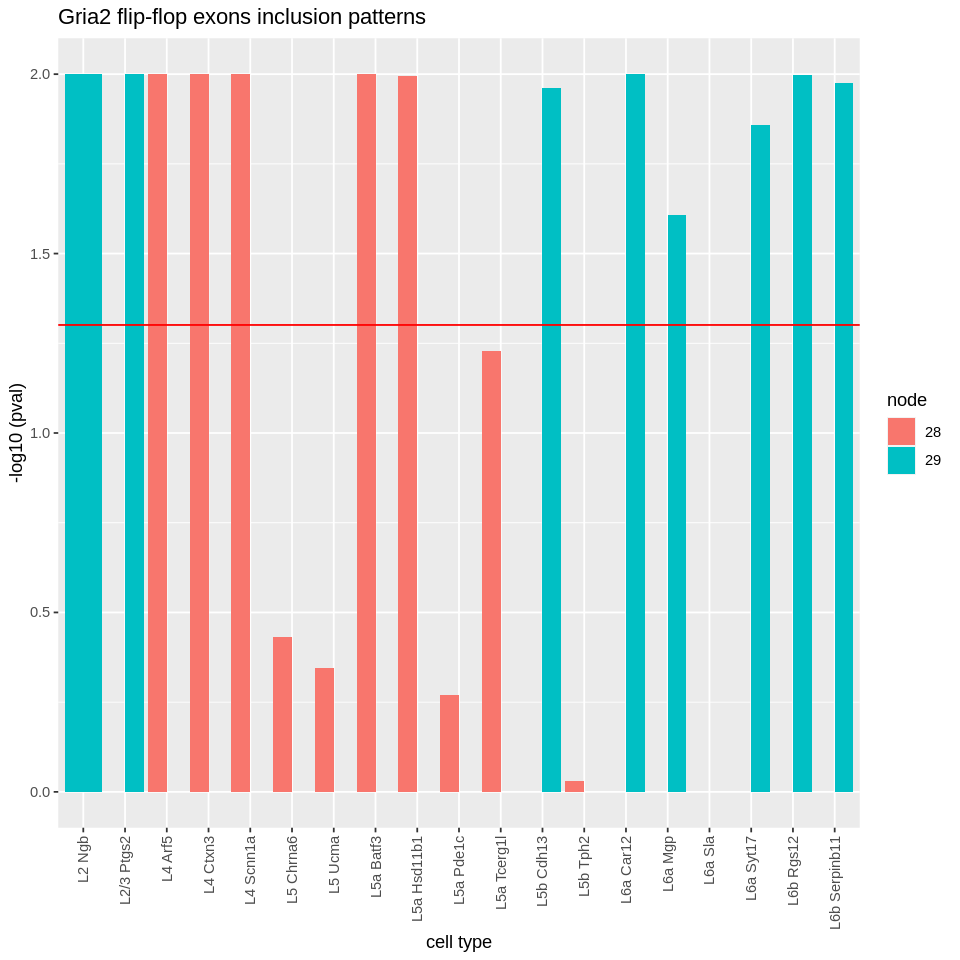

In [21]:
# visulize cell types by their significance of splicing-in the two nodes

ggplot(Gria2_flipflop_cell_types, aes(x = type, y = logp, fill = node)) + 
    geom_bar(stat = "identity", position = "dodge") + 
    labs(x = "cell type", 
         y = "-log10 (pval)", 
         title = "Gria2 flip-flop exons inclusion patterns") + 
    scale_x_discrete(guide = guide_axis(angle = 90)) + 
    ylim(0, 2) + 
    # add a 0.05 p value cutoff
    geom_abline(intercept = -log10(0.05), 
                slope = 0, 
                colour = "red", 
                size = 0.5)
fig(10, 6)

# the query shows that L4 and L5 cells have an enrichment of splicing in node 28, while L2 and L6 cells choose node 29

### 3. Retrieve actual PSI for discovered splicing patterns

In [22]:
## now we retrieve the actual PSI values using pesudo-bulk data
## here, 5 single cells are merged to create a pseudo-bulk

Gria2_PSI <- readRDS("~/Gria2_PSI.rds")
head(Gria2_PSI)

,primary_type,cell_num,node_name,PSI
,<chr>,<chr>,<chr>,<dbl>
1,L2/3_Ptgs2,L2/3_Ptgs2_1,Gria2_1,0.0000
2,L2/3_Ptgs2,L2/3_Ptgs2_1,Gria2_2,0.0000
3,L2/3_Ptgs2,L2/3_Ptgs2_1,Gria2_3,0.0000
4,L2/3_Ptgs2,L2/3_Ptgs2_1,Gria2_4,0.5064
5,L2/3_Ptgs2,L2/3_Ptgs2_1,Gria2_5,0.0007
6,L2/3_Ptgs2,L2/3_Ptgs2_1,Gria2_6,0.3832


In [23]:
# to visulize the ground-truth of PSI values for Gria2 node 28 and 29
Gria2_PSI_flipflop <- Gria2_PSI[which(Gria2_PSI$node_name %in% c("Gria2_28", "Gria2_29")), ]

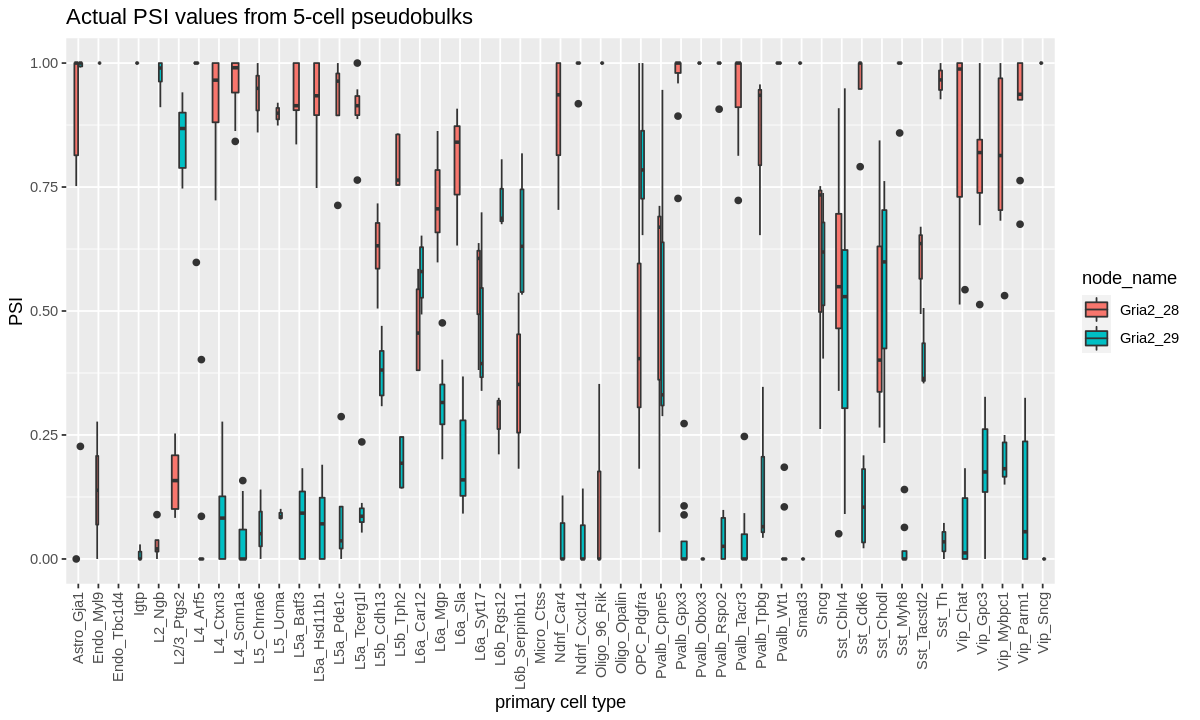

In [24]:
# use boxplot to show the PSI values of the discovered flip-flop exon pair among cell types

ggplot(Gria2_PSI_flipflop, 
       aes(x = primary_type, 
           y = PSI, 
           fill = node_name)) + 
    geom_boxplot(varwidth = T, 
                 na.rm = TRUE) + 
    scale_x_discrete(guide = guide_axis(angle = 90)) + 
    labs(title="Actual PSI values from 5-cell pseudobulks", 
         x="primary cell type",
         y="PSI")
fig(18, 10)

### 4. Comprehensive illustration of splicing patterns of an interested gene

In [25]:
# to visulize the actual splicing events of all nodes in Gria2 gene

Gria2_PSI$node_num <- as.numeric(gsub("Gria2_", "", Gria2_PSI$node_name))
Gria2_PSI <- Gria2_PSI[order(Gria2_PSI$node_num), ]

In [26]:
# make factor and reorder the node_names for clarity

Gria2_PSI$node_name <- factor(Gria2_PSI$node_name, levels = unique((Gria2_PSI$node_name)[order(Gria2_PSI$node_num)]))
head(Gria2_PSI)

,primary_type,cell_num,node_name,PSI,node_num
,<chr>,<chr>,<fct>,<dbl>,<dbl>
1,L2/3_Ptgs2,L2/3_Ptgs2_1,Gria2_1,0,1
28,L2/3_Ptgs2,L2/3_Ptgs2_10,Gria2_1,0,1
55,L2/3_Ptgs2,L2/3_Ptgs2_11,Gria2_1,0,1
82,L2/3_Ptgs2,L2/3_Ptgs2_12,Gria2_1,0,1
109,L2/3_Ptgs2,L2/3_Ptgs2_13,Gria2_1,0,1
136,L2/3_Ptgs2,L2/3_Ptgs2_14,Gria2_1,0,1


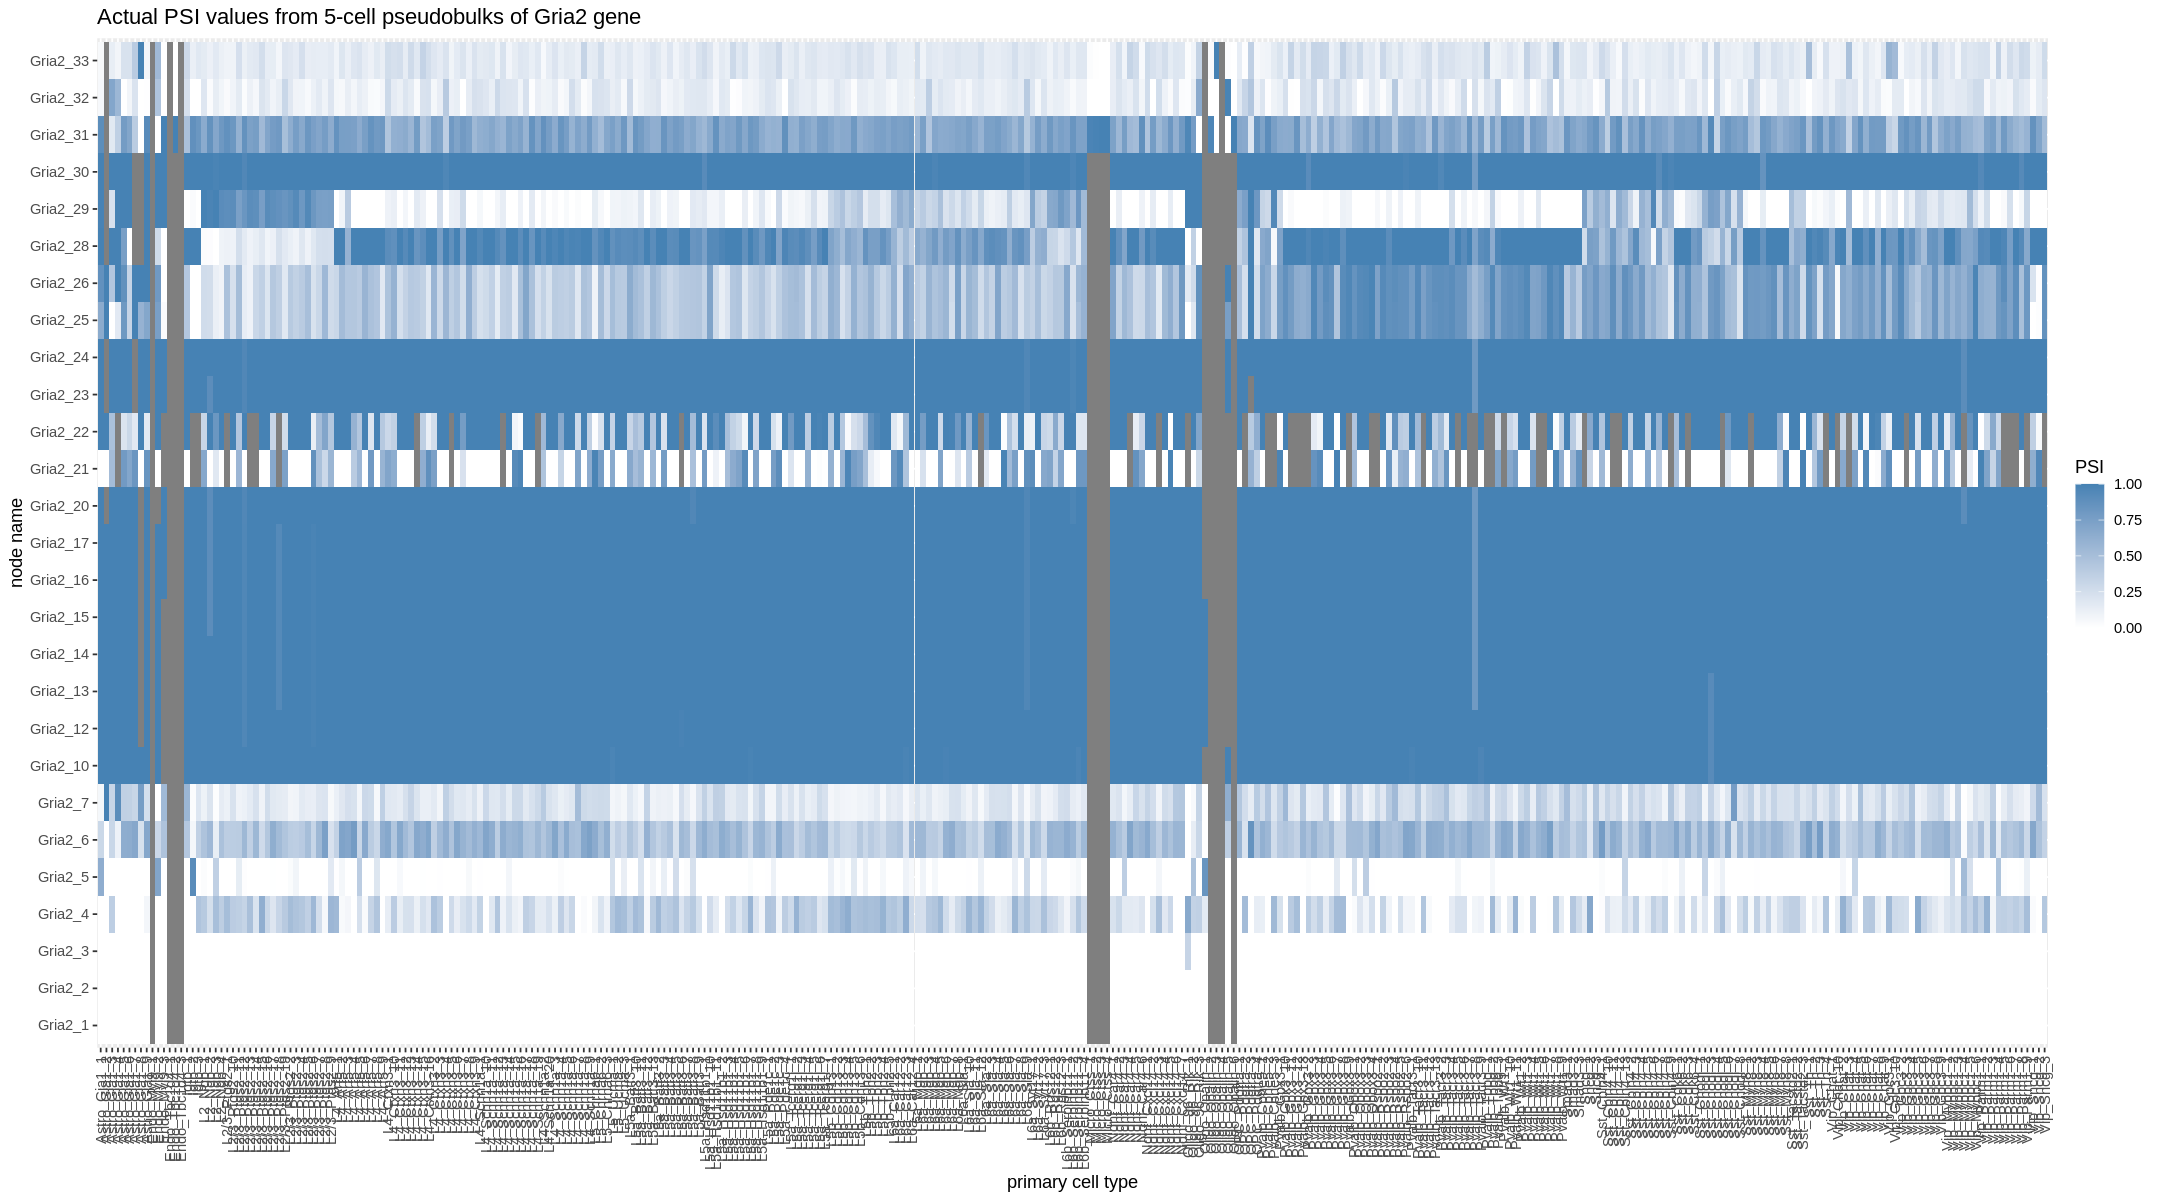

In [27]:
# finally, we can use heatmaps to show the splicing pattern of Gria2 across all pseudo-bulk cells

ggplot(Gria2_PSI, aes(x = cell_num, 
                      y = node_name)) +
    geom_tile(aes(fill = PSI), 
             na.rm = TRUE) + 
    scale_fill_gradient(low = "white",
                        high = "steelblue") +
    scale_x_discrete(guide = guide_axis(angle = 90)) + 
    labs(title="Actual PSI values from 5-cell pseudobulks of Gria2 gene", 
         x="primary cell type",
         y="node name")
fig(18, 8)

# some nodes are undetected in a cell type, resulting in NA values
# this might be due to experimental artifacts
# pair-wise corr

## Session info

In [28]:
# for reproducibility

sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.3 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.7.1
LAPACK: /usr/lib/x86_64-linux-gnu/openblas/liblapack.so.3

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] repr_1.1.0     ggplot2_3.3.2  tidyr_1.1.2    dplyr_1.0.0    tibble_3.0.4  
[6] scfindME_0.1.0

loaded via a namespace (and not attached):
 [1] bitops_1.0-6                matrixStats_0.56.0         
 [3] fs_1.4.2                    usethis_1.6.3              
 [5] d